# TAREA 5 | PUNTO 2 | ECUACIÓN DIFERENCIAL DE CONDUCCIÓN DE CALOR 2D:

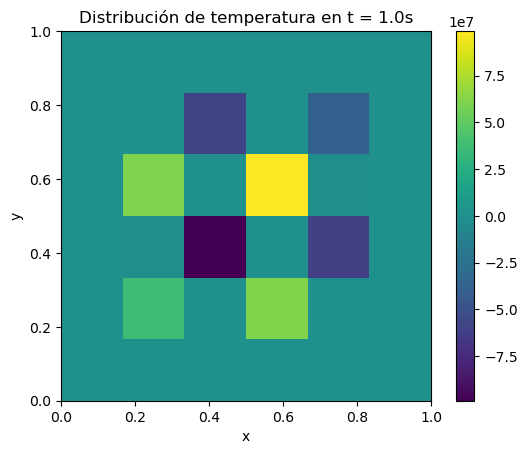

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros dados
alpha = beta = 1.0
dx = dy = 0.2
dt = 0.1
T_max = 1.0

# Número de puntos en cada dimensión
nx = int(1/dx) + 1
ny = int(1/dy) + 1
nt = int(T_max/dt) + 1

# Crear malla
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
t = np.linspace(0, T_max, nt)

# Inicializar la matriz de solución
u = np.zeros((nx, ny, nt))

# Aplicar la condición inicial
for i in range(nx):
    for j in range(ny):
        u[i, j, 0] = np.sin(np.pi * (x[i] + y[j]))

# Funciones para las condiciones de frontera
def boundary_condition_1(y, t):
    return np.exp(-2 * np.pi**2 * t) * np.sin(np.pi * y)

def boundary_condition_2(x, t):
    return np.exp(-2 * np.pi**2 * t) * np.sin(np.pi * x)

# Aplicar las condiciones de frontera en cada paso de tiempo
for k in range(1, nt):
    for j in range(ny):
        u[0, j, k] = boundary_condition_1(y[j], t[k])  # u(0, y, t)
        u[-1, j, k] = boundary_condition_2(x[-1], t[k])  # u(1, y, t)
    for i in range(nx):
        u[i, 0, k] = boundary_condition_1(1 + y[0], t[k])  # u(x, 0, t)
        u[i, -1, k] = boundary_condition_2(1 + x[i], t[k])  # u(x, 1, t)

# Resolver la ecuación diferencial usando el método de diferencias finitas
for k in range(0, nt - 1):
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u[i, j, k + 1] = u[i, j, k] + alpha * dt / dx**2 * (u[i + 1, j, k] - 2 * u[i, j, k] + u[i - 1, j, k]) \
                             + beta * dt / dy**2 * (u[i, j + 1, k] - 2 * u[i, j, k] + u[i, j - 1, k])

# Visualizar la solución en el último paso de tiempo
plt.imshow(u[:, :, -1], extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución de temperatura en t = {:.1f}s'.format(T_max))
plt.show()